In [45]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


from tensorflow.keras import backend as K
#from tf.keras.utils import np_utils
%matplotlib inline

In [46]:
import pickle
#here the x and y are retrived
pickle_in = open("x1.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)

#X[0] means the array of images we changed its type to float32
X[0] = X[0].astype('float32')
#then we normalized the data as we know min is 0 and maximum is 255 we divide it by 255
X[0] = X[0]/255.0
#just to check the shape
X[0].shape


(120, 120, 1)

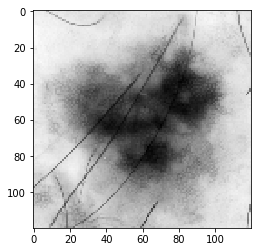

In [47]:
plt.imshow(np.squeeze(X[4]), cmap='gray')

In [48]:
#now we define our model as sequential which is a linear stack of layers which accepts an array and within that array it has elements each of which is a layer
classifier = Sequential()

In [49]:
#this is the first convolutinal layer.here if we donot specify activation function keras assumes it to be linear
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape =X.shape[1:], activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.8)) # dropout means 0.8 percent of the nodes will be working at any time

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.8)) 

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.8)) 


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection.Dense layer in keras is used for fully connected layers
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.8)) 
classifier.add(Dense(units = 1, activation = 'sigmoid'))


In [50]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 120, 120, 32)      320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 118, 118, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 59, 59, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 57, 57, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 64)        0         
__________

In [51]:
#now we compile the model
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

In [52]:
#we fit the model our batch size is 32 meaning that we will process 32 at one time 
classifier.fit(np.array(X),np.array(y), batch_size=32, epochs=3, validation_split=0.3)

Train on 3173 samples, validate on 1361 samples
Epoch 1/3
3173/3173 [==============================] - 229s 72ms/step - loss: 4.1840 - acc: 0.7397 - val_loss: 3.9437 - val_acc: 0.7553
Epoch 2/3
3173/3173 [==============================] - 235s 74ms/step - loss: 3.9876 - acc: 0.7526 - val_loss: 3.9437 - val_acc: 0.7553
Epoch 3/3
3173/3173 [==============================] - 265s 83ms/step - loss: 3.9876 - acc: 0.7526 - val_loss: 3.9437 - val_acc: 0.7553


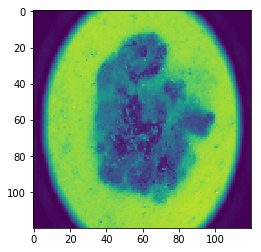

(1, 120, 120)


In [65]:
#here we have taken one image from the dataset and processed it
from tensorflow.keras.preprocessing import image
import cv2
import os
img_path = '/home/dell/Desktop/train_Malignant/'
"""img_array = cv2.imread(os.path.join(img_path,'ISIC_0000013.jpg') ,cv2.IMREAD_GRAYSCALE)  # convert to array
img_tensor = cv2.resize(img_array, (120,120))

import numpy as np
"""
img = image.load_img(img_path+'ISIC_0000140.jpg', target_size=(120,120))
#list is coverted to array
img_tensor = image.img_to_array(img)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
#now we convert it to grayscale
img_tensor=rgb2gray(img_tensor)

plt.imshow(img_tensor)
plt.show()

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255


print(img_tensor.shape)

In [22]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

ValueError: Error when checking input: expected conv2d_7_input to have shape (120, 120, 1) but got array with shape (120, 120, 3)

In [66]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in classifier.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input


In [67]:

img_tensor=np.array(img_tensor).reshape((120,120,1))
img_tensor = np.expand_dims(img_tensor, axis=0)
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation


In [68]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 120, 120, 32)


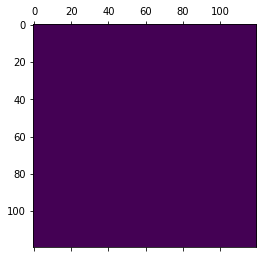

In [31]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in divide


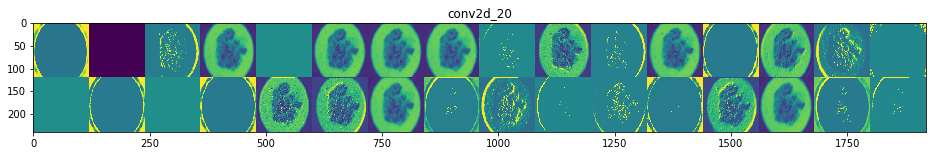

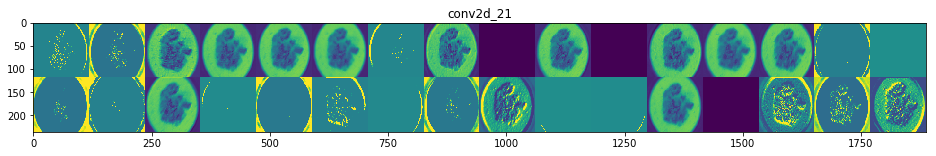

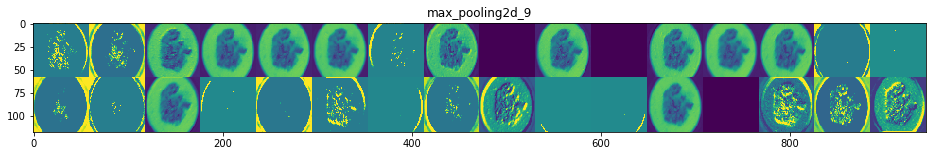

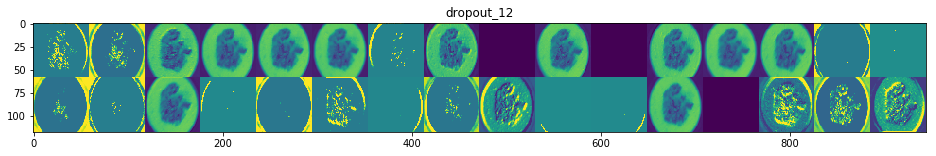

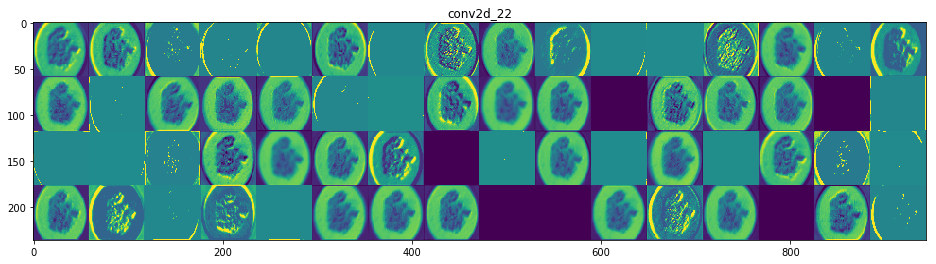

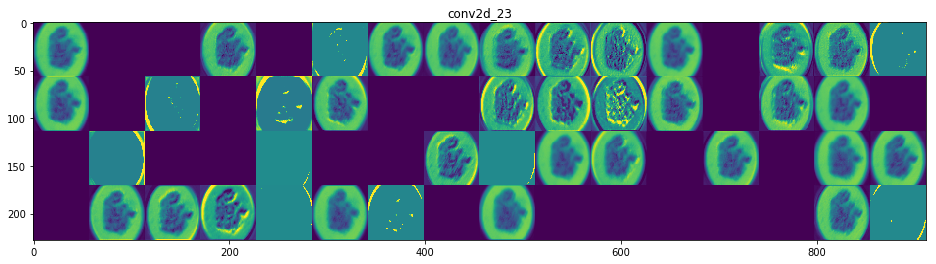

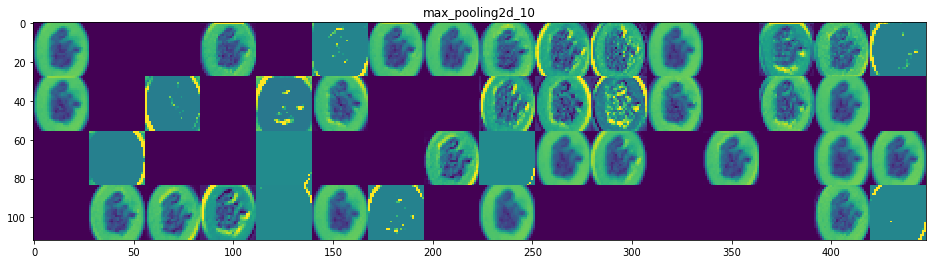

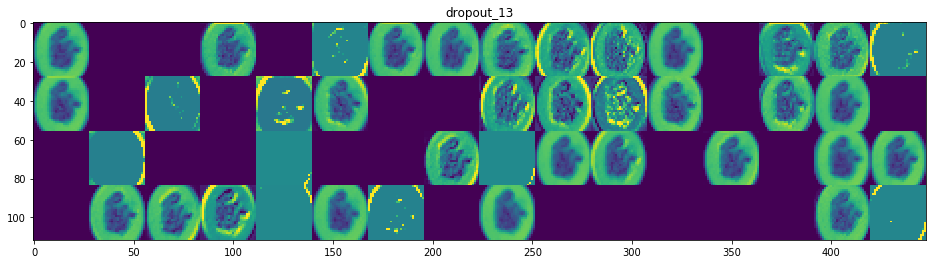

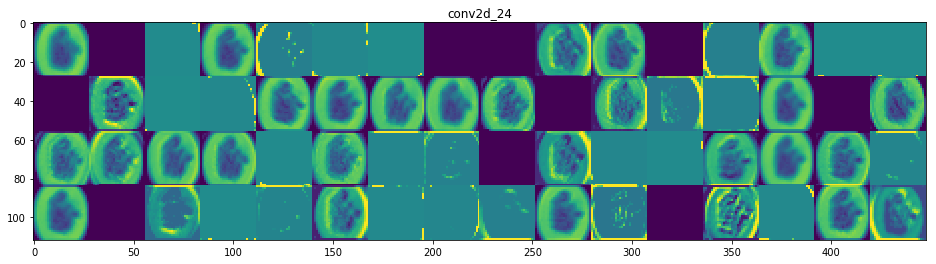

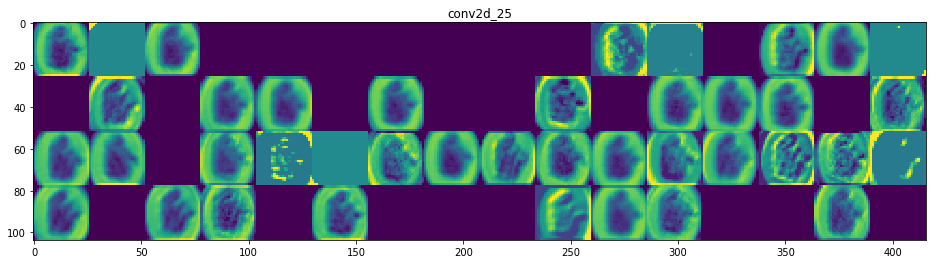

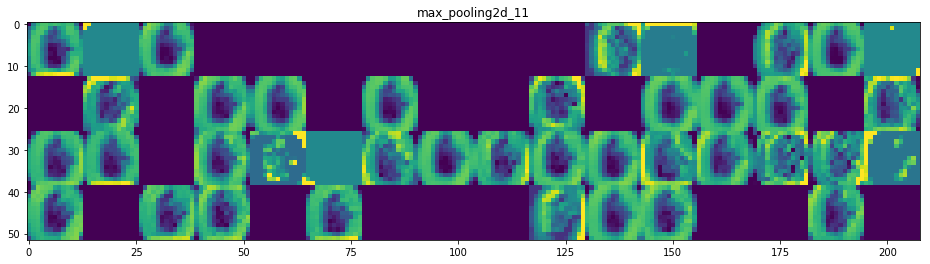

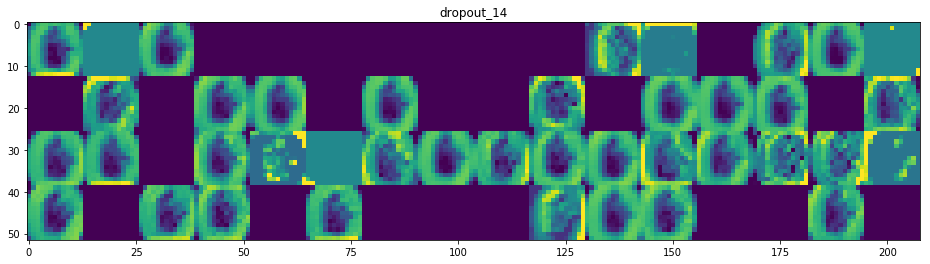

In [69]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')